### Cab-Driver Agent

In [2]:
# Importing libraries
import numpy as np
import random
import math
import os
import collections
import pickle
from collections import deque

# for building DQN model
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten
from tensorflow.keras.optimizers import Adam

# for plotting graphs
import matplotlib.pyplot as plt

# Import the environment
from Env import CabDriver

#### Defining Time Matrix

In [2]:
# Loading the time matrix provided
Time_matrix = np.load("TM.npy")

#### Tracking the state-action pairs for checking convergence


In [3]:
#Defining a function which will return valid actions corresponding to a state

def valid_actions(state):

    valid_Actions = []
    
    valid_Actions = [i for i in env.requests(state)[1]]
    #print(valid_Actions)
    return valid_Actions

In [4]:
# Initialize the Q_dictionary
Q_dict = collections.defaultdict(list)


In [5]:
#Defining a function which will add new Q-values to the Q-dictionary
def add_to_dict(state, q_values):
    Q_dict[state].append(q_values)


In [6]:
#Defining a function to save the Q-dictionary as a pickle file
def save_obj(obj, name ):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

### Agent Class

If you are using this framework, you need to fill the following to complete the following code block:
1. State and Action Size
2. Hyperparameters
3. Create a neural-network model in function 'build_model()'
4. Define epsilon-greedy strategy in function 'get_action()'
5. Complete the function 'append_sample()'. This function appends the recent experience tuple <state, action, reward, new-state> to the memory
6. Complete the 'train_model()' function with following logic:
   - If the memory size is greater than mini-batch size, you randomly sample experiences from memory as per the mini-batch size and do the following:
      - Initialise your input and output batch for training the model
      - Calculate the target Q value for each sample: reward + gamma*max(Q(s'a,))
      - Get Q(s', a) values from the last trained model
      - Update the input batch as your encoded state and output batch as your Q-values
      - Then fit your DQN model using the updated input and output batch.

In [7]:
class DQNAgent:
    def __init__(self, state_size, action_size):
        # Define size of state and action
        self.state_size = state_size
        self.action_size = action_size
        

        # Write here: Specify you hyper parameters for the DQN
        self.discount_factor = 0.9
        self.learning_rate = 0.001 
        self.epsilon = 1
        self.epsilon_min = 0.01
        
        self.batch_size = 32        
        # create replay memory using deque
        self.memory = deque(maxlen=2000)

        # create main model and target model
        self.model = self.build_model()

    # approximate Q function using Neural Network
    def build_model(self):
    
        model = Sequential()
        # Write your code here: Add layers to your neural nets       
      
        model.add(Dense(32, input_dim= self.state_size, activation='relu', kernel_initializer='he_uniform')) 
        model.add(Dense(32, activation='relu', kernel_initializer='he_uniform'))

        # the output layer: output is of size num_actions
        model.add(Dense(self.action_size, activation='relu', kernel_initializer='he_uniform'))
        
        model.compile(loss='mse',optimizer=Adam(lr=self.learning_rate))
        
        model.summary
        return model



    def get_action(self, state, episode):
        # Write your code here:
        # Decay in ε after we generate each sample from the environment  
        
        decayed_epsilon = (self.epsilon_min + (self.epsilon - self.epsilon_min) * np.exp(-0.0009*episode))
       
        if np.random.rand() <= decayed_epsilon:     # pick an action randomly
            return random.choice(valid_actions(state))     
        else:                                       # pick a greedy action
            state_list = list(state)
            if len(state_list) > 3:  
                state_list.pop(3)  #Remove the total_time element
            
            # Encode state
            state = env.state_encod_arch1(tuple(state_list))
            
            # Reshape the input to the correct dimensions for the NN
            state = state.reshape(1, self.state_size)
            
            q_value = self.model.predict(state)
            
            # Add this state and the corresponding predicted q-values to the Q_dict
            add_to_dict(tuple(state_list), q_value)
  
            return env.action_space[np.argmax(q_value[0])]   


    def append_sample(self, state, action, reward, next_state):
        # Write your code here:
        # save sample <s,a,r,s'> to the replay memory
        
        self.memory.append((state, action, reward, next_state))


    
    # pick samples randomly from replay memory (with batch_size) and train the network
    def train_model(self):
        
        if len(self.memory) > self.batch_size:

            # Sample batch from the memory
            mini_batch = random.sample(self.memory, self.batch_size)
            update_output = np.zeros((self.batch_size, self.state_size)) # write here
            update_input = np.zeros((self.batch_size, self.state_size)) # write here
            
            actions, rewards = [], []
            
            for i in range(self.batch_size):
                curr_state, curr_action, curr_rewards, next_state = mini_batch[i]
    
                # Write your code from here
                update_input[i] = np.array(curr_state)
                actions.append(np.array(curr_action))
                rewards.append(curr_rewards)
                update_output[i] = np.array(next_state)
    
            # 1. Predict the target from earlier model
            target = self.model.predict(update_input)


            # 2. Get the target for the Q-network
            target_qval = self.model.predict(update_output)


            #3. Update your 'update_output' and 'update_input' batch
            for i in range(self.batch_size):
                
                target[i][actions[i]] = rewards[i] + self.discount_factor * np.max(target_qval[i]) 

                
            # 4. Fit your model and track the loss values
            self.model.fit(update_input, target, batch_size=self.batch_size, epochs=1, verbose=0)

    def save(self, name):
        self.model.save(name)

In [8]:
# Make dir to store model weights
if not os.path.exists("saved_model_weights"):
    os.mkdir("saved_model_weights")


In [9]:
# Specify number of episodes and threshold for saving model metrics
Episodes = 500
threshold = 50

### DQN block

EPISODE:  0
One month trip over
EPISODE:  1
One month trip over
EPISODE:  2
One month trip over
EPISODE:  3
One month trip over
EPISODE:  4
One month trip over
EPISODE:  5
One month trip over
EPISODE:  6
One month trip over
EPISODE:  7
One month trip over
EPISODE:  8
One month trip over
EPISODE:  9
One month trip over
EPISODE:  10
One month trip over
EPISODE:  11
One month trip over
EPISODE:  12
One month trip over
EPISODE:  13
One month trip over
EPISODE:  14
One month trip over
EPISODE:  15
One month trip over
EPISODE:  16
One month trip over
EPISODE:  17
One month trip over
EPISODE:  18
One month trip over
EPISODE:  19
One month trip over
EPISODE:  20
One month trip over
EPISODE:  21
One month trip over
EPISODE:  22
One month trip over
EPISODE:  23
One month trip over
EPISODE:  24
One month trip over
EPISODE:  25
One month trip over
EPISODE:  26
One month trip over
EPISODE:  27
One month trip over
EPISODE:  28
One month trip over
EPISODE:  29
One month trip over
EPISODE:  30
One mon

One month trip over
EPISODE:  245
One month trip over
EPISODE:  246
One month trip over
EPISODE:  247
One month trip over
EPISODE:  248
One month trip over
EPISODE:  249
One month trip over
EPISODE:  250
One month trip over
EPISODE:  251
One month trip over
EPISODE:  252
One month trip over
EPISODE:  253
One month trip over
EPISODE:  254
One month trip over
EPISODE:  255
One month trip over
EPISODE:  256
One month trip over
EPISODE:  257
One month trip over
EPISODE:  258
One month trip over
EPISODE:  259
One month trip over
EPISODE:  260
One month trip over
EPISODE:  261
One month trip over
EPISODE:  262
One month trip over
EPISODE:  263
One month trip over
EPISODE:  264
One month trip over
EPISODE:  265
One month trip over
EPISODE:  266
One month trip over
EPISODE:  267
One month trip over
EPISODE:  268
One month trip over
EPISODE:  269
One month trip over
EPISODE:  270
One month trip over
EPISODE:  271
One month trip over
EPISODE:  272
One month trip over
EPISODE:  273
One month trip

One month trip over
EPISODE:  486
One month trip over
EPISODE:  487
One month trip over
EPISODE:  488
One month trip over
EPISODE:  489
One month trip over
EPISODE:  490
One month trip over
EPISODE:  491
One month trip over
EPISODE:  492
One month trip over
EPISODE:  493
One month trip over
EPISODE:  494
One month trip over
EPISODE:  495
One month trip over
EPISODE:  496
One month trip over
EPISODE:  497
One month trip over
EPISODE:  498
One month trip over
EPISODE:  499
One month trip over


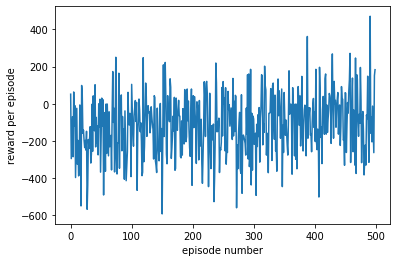

In [10]:
# Call the environment
env = CabDriver()

# Call all the initialised variables of the environment
m = env.m
d = env.d
t = env.t

#Call the DQN agent    
agent = DQNAgent((m+d+t), len(env.action_space))

# Initialize arrays for storing various episodic metrics like rewards, total trips and good choices
rewards_per_episode = []


for episode in range(Episodes):
    print('EPISODE: ',episode)
    # Write code here
    
    score = 0
    total_hours = 0
  
    # reset at the start of each episode
    env.reset()
    state = env.state_init
    

    day = 0
    while day < 30:
        # Write your code here
        # 1. Pick epsilon-greedy action from possible actions for the current state
        action = agent.get_action(state, episode)
       
        # 2. Evaluate your reward and next state
        next_state = env.next_state_func(state, action, Time_matrix, total_hours) # total_hours keeps track of 24 hour time period
        reward = env.reward_func(state, action, Time_matrix)
       
        state_list = list(state)
        
        if len(state_list) > 3:  
            state_list.pop(3)  #Remove the total_time element


        next_state_list = list(next_state)
        next_state_list.pop(3)  #Remove the total_time element

        # Encode state and next_state
        encoded_state = env.state_encod_arch1(tuple(state_list))
        encoded_next_state = env.state_encod_arch1(tuple(next_state_list))

        # 3. Append the experience to the memory
        agent.append_sample(encoded_state, action, reward, encoded_next_state)

        # 4. Train the model by calling function agent.train_model
        agent.train_model()
        
        # Add the rewards gained in this episode to the total score
        score += reward
        
        
        # Get total trip hours
        total_hours =  next_state[3]
        
        if total_hours >= 24:
            # Increment the day by one
            day += 1
            
            # Reset total_hours
            total_hours = total_hours % 24

        if day == 29:
            print('One month trip over')
            break
        else:   
            # Update next_state as the current state for the next iteration
            state = next_state
           

    # 5. Keep a track of rewards and Q-values
    
    rewards_per_episode.append(score) 

    # After every few episodes:
    
    # Save model weights
    if episode % threshold == 0:         
        agent.save(name="DQN_model_weights.h5")
        
    # Save policy
    if ((episode + 1)% threshold ) == 0:  
        save_obj(Q_dict,'saved_pickle_files/Policy') 
        

#### simulation complete ####

# save stuff as pickle
def save_pickle(obj, name):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

# make directory
if not os.path.exists("saved_pickle_files"):
    os.mkdir("saved_pickle_files")

# save rewards_per_episode
save_pickle(rewards_per_episode, "saved_pickle_files/rewards_per_episode")


# plot results
with open('saved_pickle_files/rewards_per_episode.pkl', 'rb') as f:
    rewards_per_episode = pickle.load(f)

plt.plot(list(range(len(rewards_per_episode))), rewards_per_episode)
plt.xlabel("episode number")
plt.ylabel("reward per episode")

# save plots in saved_plots/ directory
plt.savefig('saved_pickle_files/rewards.png')



#### View the Q_Dictionary

In [2]:
with open('saved_pickle_files/Policy.pkl', 'rb') as handle:
    Q_dict = pickle.load(handle) 
print('*** The Q Dictionary is of length: ',len(Q_dict))
#print(Q_dict)

*** The Q Dictionary is of length:  839


#### View total rewards earned per episode

Max reward earned in an episode :  471
Min reward earned in an episode :  -594


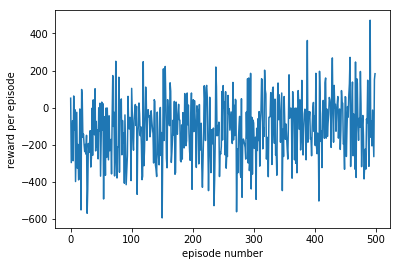

In [3]:
# plot rewards
with open('saved_pickle_files/rewards_per_episode.pkl', 'rb') as f:
    rewards_per_episode = pickle.load(f)

plt.plot(list(range(len(rewards_per_episode))), rewards_per_episode)
plt.xlabel("episode number")
plt.ylabel("reward per episode")
print("Max reward earned in an episode : ", max(rewards_per_episode))
print("Min reward earned in an episode : ", min(rewards_per_episode))

In [5]:
rewards_per_50_episodes = np.split(np.array(rewards_per_episode),len(rewards_per_episode)/100)
count = 100
print("********Average reward per 50 episodes********\n")

for r in rewards_per_50_episodes:
    print(count, ": ", str(sum(r/100)))
    count += 100

********Average reward per 50 episodes********

100 :  -163.49
200 :  -118.1
300 :  -135.25000000000006
400 :  -92.1
500 :  -63.68000000000001


### Tracking Convergence

<div class="alert alert-block alert-info">
We have run our DQN model (with the same hyperparameters as specified above) on the terminal for 12K episodes and saved the rewards and policy as pickle files under a folder named 'saved_pickle_files_12k'. The model weights have also been saved as 'DQN_model_weights_12k.h5'. All these files are available as part of our submitted zip file.

In order to verify the convergence of out DQN model, we have provided plots for:
    1. Stability of the total rewards earned per episode 
    2. Sampled a few state-action pairs from the Q_Dictionary and ploted their Q-values 

</div>



#### 1. Plot of total rewards earned

Max reward earned in an episode :  996.0
Min reward earned in an episode :  -594.0


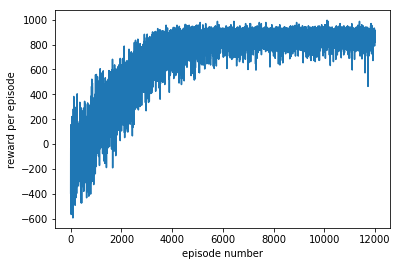

In [3]:
# plot results
with open('saved_pickle_files_12k/rewards_per_episode.pkl', 'rb') as f:
    rewards_per_episode = pickle.load(f)

plt.plot(list(range(len(rewards_per_episode))), rewards_per_episode)
plt.xlabel("episode number")
plt.ylabel("reward per episode")
print("Max reward earned in an episode : ", max(rewards_per_episode))
print("Min reward earned in an episode : ", min(rewards_per_episode))

#### Total rewards earned per 2000 episodes

In [4]:
rewards_per_2000_episodes = np.split(np.array(rewards_per_episode),len(rewards_per_episode)/2000)
count = 2000
print("********Average reward per 2000 episodes********\n")

for r in rewards_per_2000_episodes:
    print(count, ": ", str(sum(r/2000)))
    count += 2000

********Average reward per 2000 episodes********

2000 :  119.24149999999986
4000 :  612.9579999999994
6000 :  826.1619999999964
8000 :  864.3554999999907
10000 :  870.2284999999904
12000 :  875.0439999999877


#### 2. Plot of sample state-action pairs from the Q_Dictionary

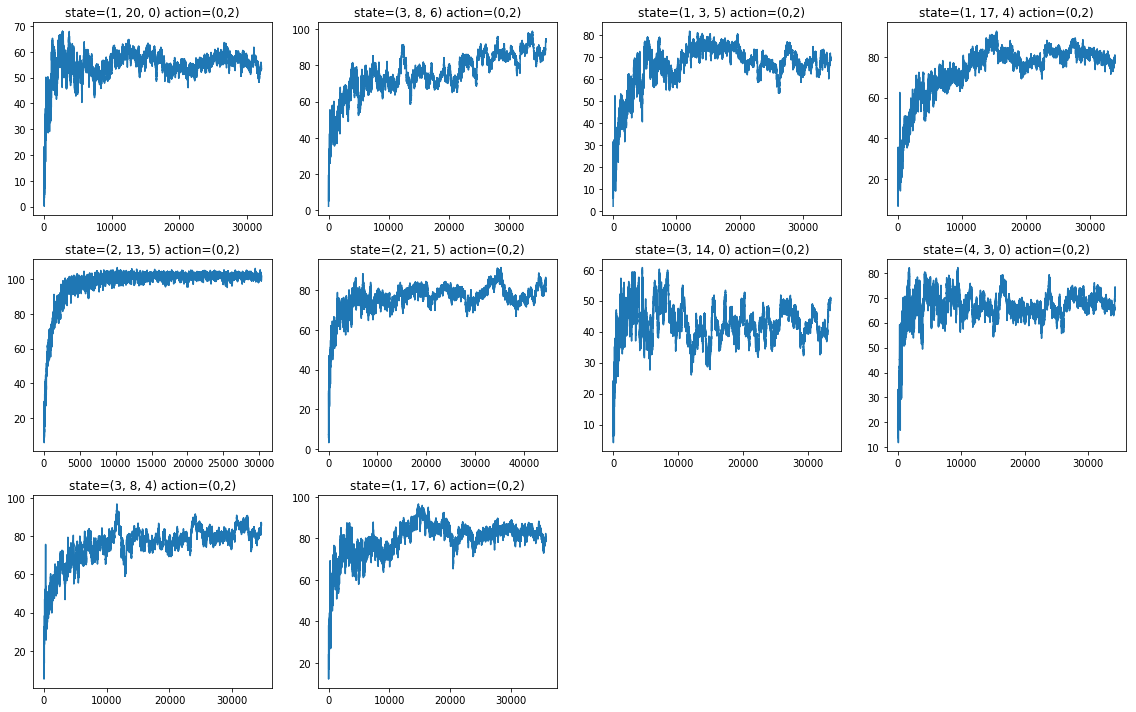

In [5]:
with open('saved_pickle_files_12k/Policy.pkl', 'rb') as handle:
    Q_dict = pickle.load(handle) 

keys = []

# Pick states from Q_dict which appeared more than 3K times
for key in Q_dict:
    if len(Q_dict[key]) >  30000:
        keys.append(key)


# Plot the state-action pairs from Q_dict
plt.figure(0, figsize=(16,10))
i = 1
for key in keys:
    action_2 = []
    for q_val in Q_dict[key]:
        action_2.append(q_val[0][2])
     
    plt.subplot(3, 4, i)
    plt.tight_layout()
    title = 'state=' + str(key) + ' action=(0,2)'
    plt.title(title)
    plt.plot(np.asarray(range(0, len(action_2))),np.asarray(action_2))
    i += 1    



#### Epsilon-decay sample function

<div class="alert alert-block alert-info">
Our model uses the following epsilon decay strategy
</div>

In [17]:
time = np.arange(0,12000)
epsilon = []
for i in range(0,12000):
    epsilon.append(0.01 + (1 - 0.01) * np.exp(-0.0009*i))

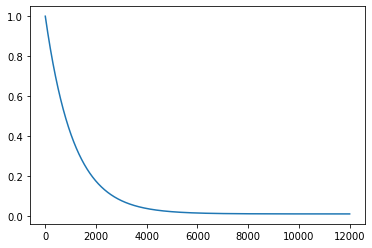

In [18]:
plt.plot(time, epsilon)
plt.show()